In [ ]:
#EDA-highlanes

In [ ]:
'''!pip install pandas  seaborn  matplotlib statsmodels numpy openpyxl scikit-learn'''

In [ ]:
import pandas as pd
import os

import warnings

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose


# To ignore all warnings
warnings.filterwarnings("ignore")

# Or to ignore specific warnings by category
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
#df=pd.read_excel(r"t1_germany_files/shipment_complete_data_active_lane.xlsx")
df=pd.read_excel('/content/shipment_complete_data_active_lane.xlsx')
# os.listdir()

In [ ]:
high_lanes = ['DE02_29142970', 'DE02_29145063', 'DE08_29144124', 'DE05_29724961', 'DE08_29222753', 'DE08_29242683', 'DE05_29146035', 'DE08_29292703', 'DE05_29546496', 'DE02_29626095', 'DE08_29142964', 'DE08_29144781', 'DE08_29143647', 'DE08_29143519']
high_lanes

['DE02_29142970',
 'DE02_29145063',
 'DE08_29144124',
 'DE05_29724961',
 'DE08_29222753',
 'DE08_29242683',
 'DE05_29146035',
 'DE08_29292703',
 'DE05_29546496',
 'DE02_29626095',
 'DE08_29142964',
 'DE08_29144781',
 'DE08_29143647',
 'DE08_29143519']

In [ ]:
df['Lane']=df['Lane'].astype('str')
old_lanes =df.groupby('Lane')['shipment'].sum().sort_values().tail(7).index.tolist()

In [ ]:
df_h = df[df['Lane'].isin(high_lanes)]
print(len(df_h))

2912


In [ ]:
items_not_in_list2 = [item for item in high_lanes if item not in old_lanes]
items_not_in_list2

['DE08_29242683',
 'DE08_29292703',
 'DE02_29626095',
 'DE08_29142964',
 'DE08_29144781',
 'DE08_29143647',
 'DE08_29143519']

In [ ]:
df2 = df_h[df_h['Lane'].isin(items_not_in_list2)][['date','shipment','Lane']]  #timeseries data

# Convert the datetime column to datetime format (if necessary)
df2['date'] = pd.to_datetime(df2['date'])

# Set the datetime column as the index
df2 = df2.set_index('date')

print(df2.sort_values(by='Lane'))

            shipment           Lane
date                               
2020-01-06         6  DE02_29626095
2022-07-18         7  DE02_29626095
2022-07-25         7  DE02_29626095
2022-08-01         7  DE02_29626095
2022-08-08        13  DE02_29626095
...              ...            ...
2021-05-24         7  DE08_29292703
2021-05-31         0  DE08_29292703
2021-06-07        10  DE08_29292703
2021-12-20        11  DE08_29292703
2023-12-25         8  DE08_29292703

[1456 rows x 2 columns]


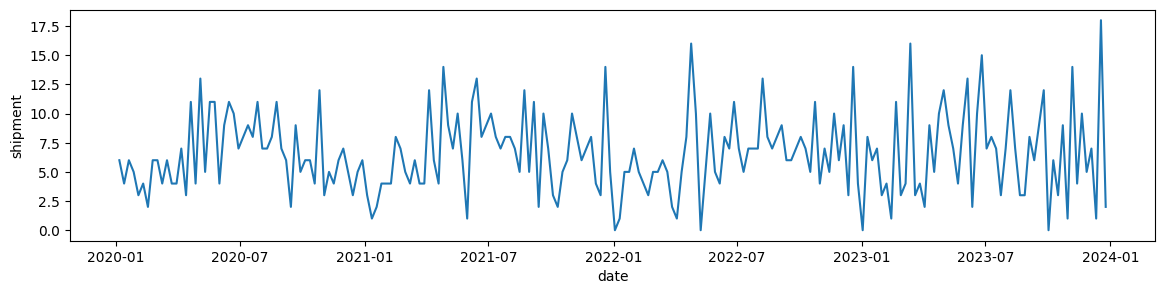

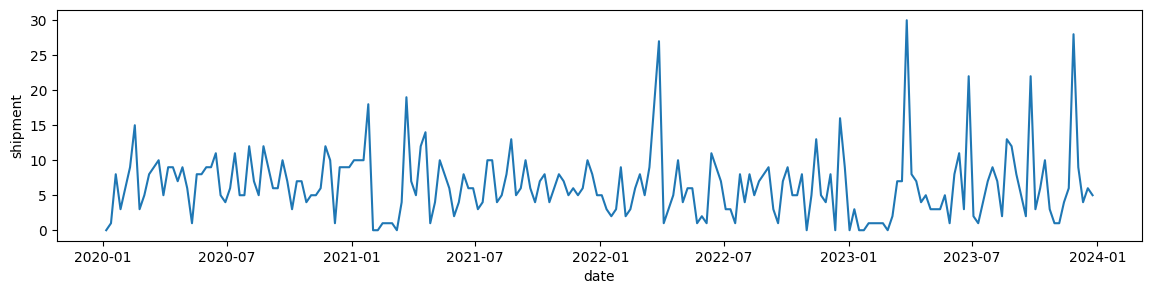

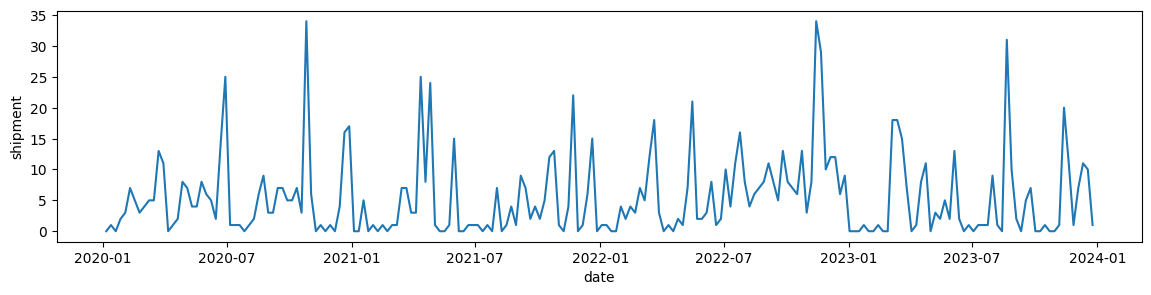

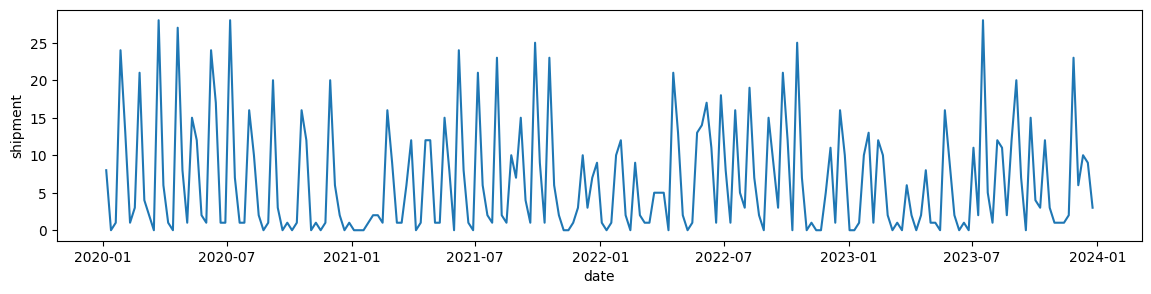

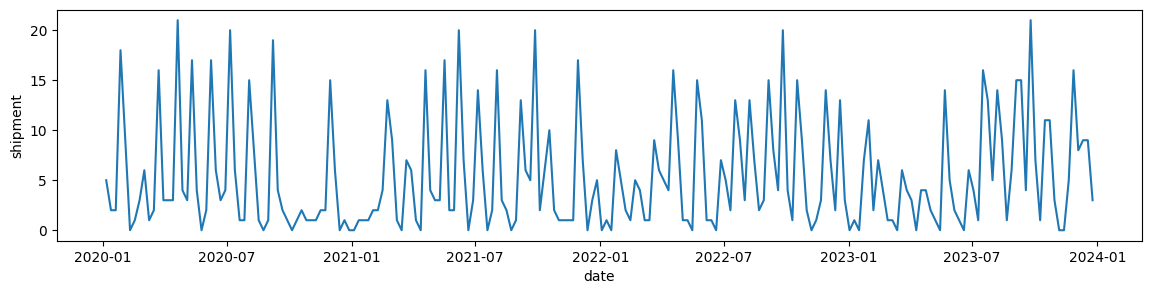

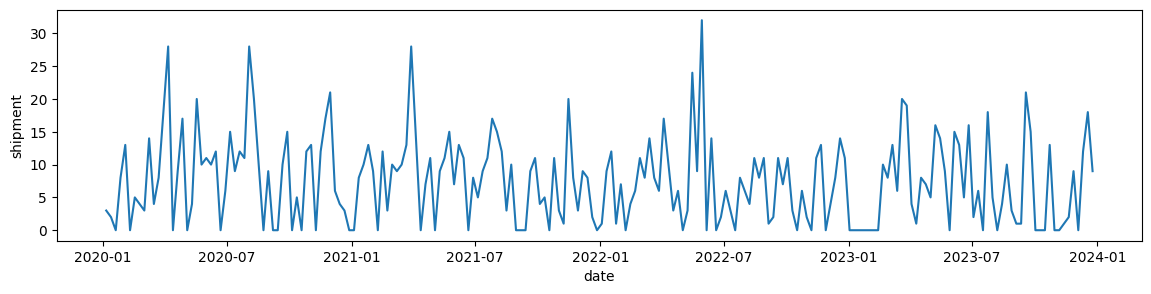

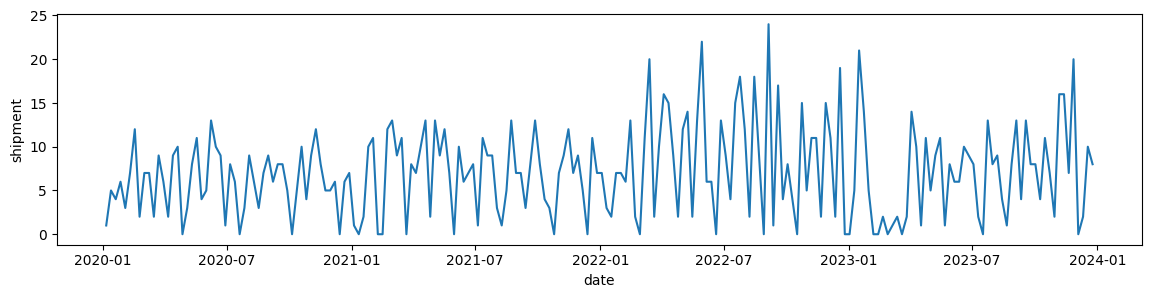

In [ ]:
# prompt: create a lineplot with hue=Column2, index=column1 and plit of column3 pandas


for lane in df2['Lane'].unique()[:2]:
  plt.figure(figsize=(14,3))
  data=df2[df2['Lane']==lane]
  sns.lineplot(
      x=data.index,
      y=data['shipment']
  )
  plt.show()



In [ ]:
#breaker # used to stop running of code

In [ ]:

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

for lane in df2['Lane'].unique()[:2]:

  print(f"lane is {lane}")
  # plt.figure(figsize=(14,3))
  data1=df2[df2['Lane']==lane]


  # Dickey-Fuller Test (ADF)
  print("----- Dickey-Fuller Test (ADF) -----")
  adf_result = adfuller(data1['shipment'])  # Apply ADF test to the 'value' series in df2

  # Print test statistics
  print(f"ADF Statistic: {adf_result[0]}")
  print(f"p-value: {adf_result[1]}")


  critical_values = {'1%': -3.47, '5%': -2.88, '10%': -2.57}  # Example critical values
  print(critical_values)
  if adf_result[0] < critical_values['5%'] and adf_result[1] < 0.05:
      print("Strong evidence for stationarity (Statistic יותר שלילי מ- Critical Value ופ-ערך נמוך)")
  elif adf_result[0] >= critical_values['10%'] and adf_result[1] >= 0.1:
      print("Weak evidence for stationarity (Statistic פחות שלילי מ- Critical Value ופ-ערך גבוה)")
  else:
      print("Inconclusive results or evidence for non-stationarity")



  ## ADF test for differenced series
  print("----- Dickey-Fuller Test (ADF) for differenced series -----")
  adf_result = adfuller(data1['shipment'].diff().dropna())  # Apply ADF test to the 'value' series in df2

  # Print test statistics
  print(f"ADF Statistic: {adf_result[0]}")
  print(f"p-value: {adf_result[1]}")




lane is DE02_29626095
----- Dickey-Fuller Test (ADF) -----
ADF Statistic: -4.115588450422853
p-value: 0.0009126308934284736
{'1%': -3.47, '5%': -2.88, '10%': -2.57}
Strong evidence for stationarity (Statistic יותר שלילי מ- Critical Value ופ-ערך נמוך)
----- Dickey-Fuller Test (ADF) for differenced series -----
ADF Statistic: -8.902987947602735
p-value: 1.1578238758566269e-14
lane is DE08_29142964
----- Dickey-Fuller Test (ADF) -----
ADF Statistic: -12.584632890982547
p-value: 1.8776379047677e-23
{'1%': -3.47, '5%': -2.88, '10%': -2.57}
Strong evidence for stationarity (Statistic יותר שלילי מ- Critical Value ופ-ערך נמוך)
----- Dickey-Fuller Test (ADF) for differenced series -----
ADF Statistic: -8.905619935182973
p-value: 1.1399986806444006e-14


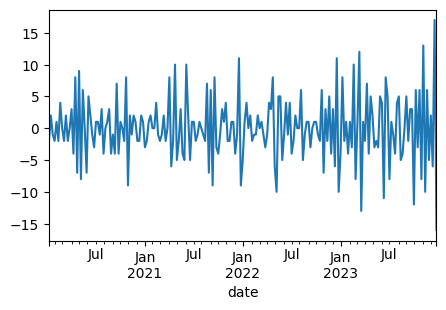

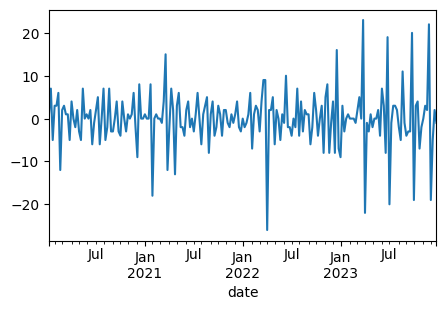

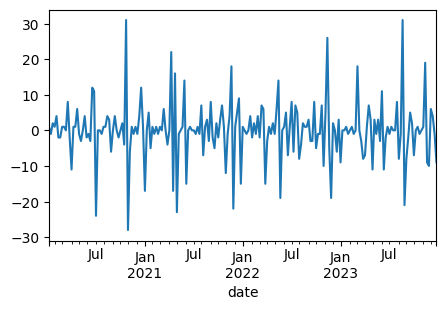

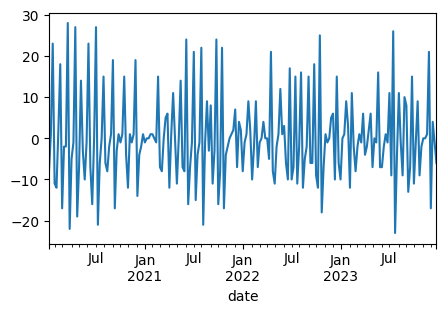

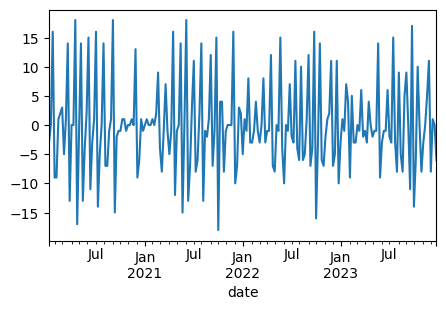

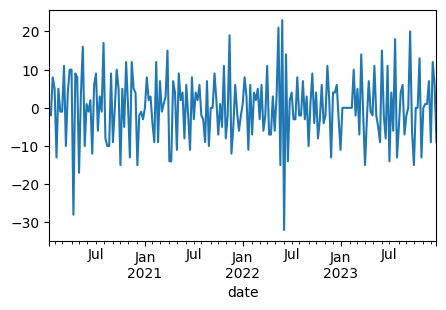

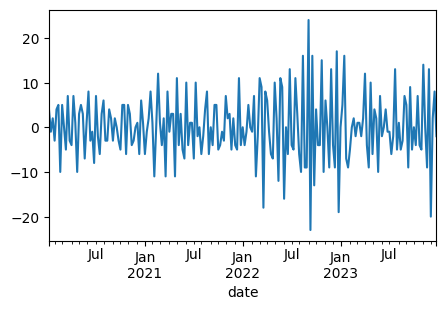

In [ ]:


# Optional: Visualize differenced series to see if stationarity is achieved after differencing
for lane in df2.Lane.unique()[:2]:

  data=df2[df2['Lane']==lane][['shipment']]

  data=data['shipment'].diff().dropna()

  plt.figure(figsize=(5,3))
  data.plot(kind='line')
  plt.show()


In [ ]:
##### DECOMPOSITION #####
#########################


##### USING multiple periods

===========================LANE IS DE02_29626095===========================================
PERIOD IS 52------------------------------
SUM VALUE OF RESIDUAL ARE [7.49]


<Figure size 1300x300 with 0 Axes>

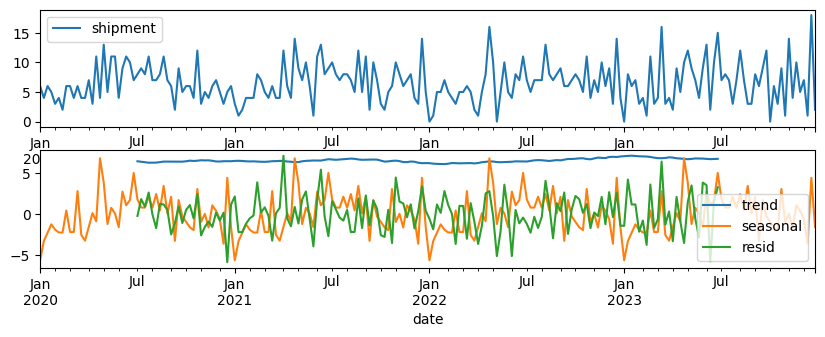

===========================LANE IS DE08_29142964===========================================
PERIOD IS 52------------------------------
SUM VALUE OF RESIDUAL ARE [2.43]


<Figure size 1300x300 with 0 Axes>

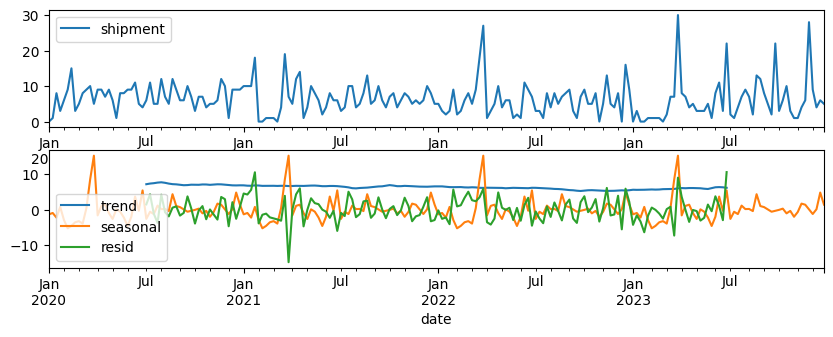

===========================LANE IS DE08_29143519===========================================
PERIOD IS 52------------------------------
SUM VALUE OF RESIDUAL ARE [-18.83]


<Figure size 1300x300 with 0 Axes>

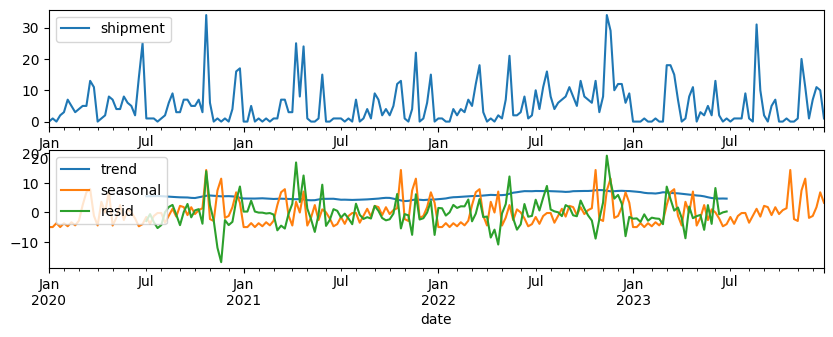

===========================LANE IS DE08_29143647===========================================
PERIOD IS 52------------------------------
SUM VALUE OF RESIDUAL ARE [-44.41]


<Figure size 1300x300 with 0 Axes>

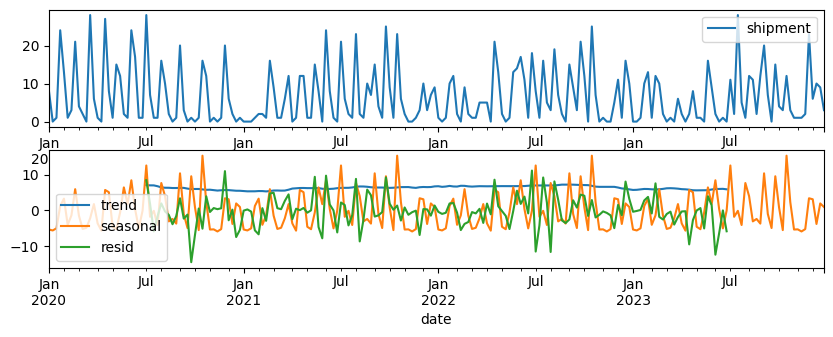

===========================LANE IS DE08_29144781===========================================
PERIOD IS 52------------------------------
SUM VALUE OF RESIDUAL ARE [-37.97]


<Figure size 1300x300 with 0 Axes>

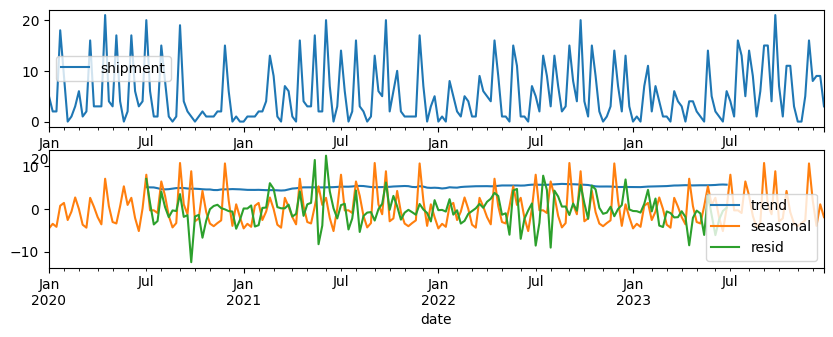

===========================LANE IS DE08_29242683===========================================
PERIOD IS 52------------------------------
SUM VALUE OF RESIDUAL ARE [32.79]


<Figure size 1300x300 with 0 Axes>

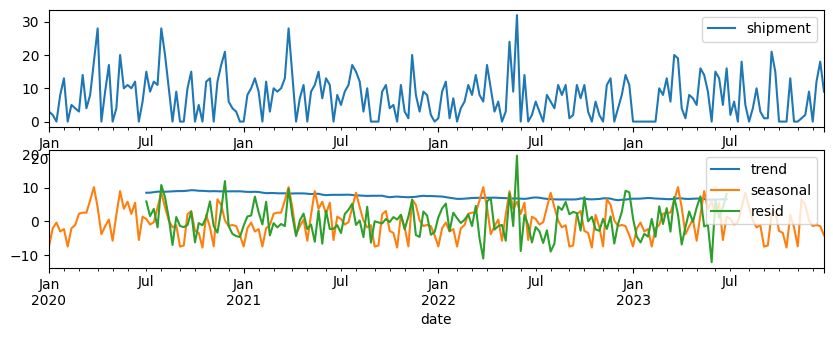

In [ ]:
'''PLOTTING TRENDS FOR DIFFERENT TIME PERIODS'''


from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

for lane in df2['Lane'].unique()[:6]:
  i=0
  residual_sum=[]

  print(F"===========================LANE IS {lane}===========================================")

  for period in [52]:
    print(F"PERIOD IS {period}------------------------------")
    i+=1



    plt.figure(figsize=(13,3))

    data=df2[df2['Lane']==lane][['shipment']]

    result = seasonal_decompose(data['shipment'], model='additive', period=period)

    # Access the decomposed components
    trend = result.trend
    seasonal = result.seasonal
    residual = result.resid


    # Visualization
    plt.figure(figsize=(10, 7))

    plt.subplot(411)
    data['shipment'].plot(kind='line')
    plt.legend()

    plt.subplot(412)
    trend.plot(kind='line')
    seasonal.plot(kind='line')
    residual.plot(kind='line')
    residual_sum.append(round(residual.sum(),2))
    print(f"SUM VALUE OF RESIDUAL ARE {residual_sum}")
    plt.legend()
    plt.show()


In [ ]:
############ trend : plot 'std dev' of trend across periods for each lane

############ seasonality : plot 'mean' and 'std dev' of seasonality fcross periods for each lane

############ for residual : plot 'mean' and 'sum' and 'std dev' of error across periods for each lane

In [ ]:
'''OBSERVATIONS

1. trend is very smooth for 8,12,13 periods
2. seasonality grows in amplitude peaks for PERIOD=13
3. errors are 0 or white noise for __ periods'''

'OBSERVATIONS\n\n1. trend is very smooth for 8,12,13 periods\n2. seasonality grows in amplitude peaks for PERIOD=13\n3. errors are 0 or white noise for __ periods'

In [ ]:
'''from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import numpy as np

# Iterate over each lane
for lane in df2['Lane'].unique():
    print(f"===========================LANE IS {lane}===========================================")

    # Initialize lists to store results across periods
    trend_std_dev = []
    seasonal_std_dev = []
    residual_mean = []
    residual_std_dev = []

    # Iterate over each period
    for period in range(4, 15):
        # Decompose the time series
        data = df2[df2['Lane'] == lane]['shipment']
        result = seasonal_decompose(data, model='additive', period=period)

        # Compute standard deviation of trend
        trend_std_dev.append(np.std(result.trend.dropna()))

        # Compute standard deviation of seasonal component
        seasonal_std_dev.append(np.std(result.seasonal.dropna()))

        # Compute mean and standard deviation of residual component
        residual_mean.append(np.mean(result.resid.dropna()))
        residual_std_dev.append(np.std(result.resid.dropna()))

    # Plot trend standard deviation across periods
    plt.figure(figsize=(12, 2))
    plt.plot(range(4, 15), trend_std_dev, marker='o')
    plt.title(f'Trend Standard Deviation for Lane {lane}')
    plt.xlabel('Period')
    plt.ylabel('Standard Deviation')
    plt.grid(True)
    plt.show()

    # Plot seasonal standard deviation across periods
    plt.figure(figsize=(12, 2))
    plt.plot(range(4, 15), seasonal_std_dev, marker='o')
    plt.title(f'Seasonal Standard Deviation for Lane {lane}')
    plt.xlabel('Period')
    plt.ylabel('Standard Deviation')
    plt.grid(True)
    plt.show()

    # Plot residual mean and standard deviation across periods
    plt.figure(figsize=(12, 2))
    plt.plot(range(4, 15), residual_mean, label='Mean', marker='o')
    plt.errorbar(range(4, 15), residual_mean, yerr=residual_std_dev, fmt='o', label='Standard Deviation')
    plt.title(f'Residual Mean and Standard Deviation for Lane {lane}')
    plt.xlabel('Period')
    plt.ylabel('Residual Component')
    plt.legend()
    plt.grid(True)
    plt.show()
'''

'from statsmodels.tsa.seasonal import seasonal_decompose\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# Iterate over each lane\nfor lane in df2[\'Lane\'].unique():\n    print(f"===========================LANE IS {lane}===========================================")\n\n    # Initialize lists to store results across periods\n    trend_std_dev = []\n    seasonal_std_dev = []\n    residual_mean = []\n    residual_std_dev = []\n\n    # Iterate over each period\n    for period in range(4, 15):\n        # Decompose the time series\n        data = df2[df2[\'Lane\'] == lane][\'shipment\']\n        result = seasonal_decompose(data, model=\'additive\', period=period)\n\n        # Compute standard deviation of trend\n        trend_std_dev.append(np.std(result.trend.dropna()))\n\n        # Compute standard deviation of seasonal component\n        seasonal_std_dev.append(np.std(result.seasonal.dropna()))\n\n        # Compute mean and standard deviation of residual component\n        residua

===========================LANE IS DE02_29626095===========================================
===========================LANE IS DE08_29142964===========================================


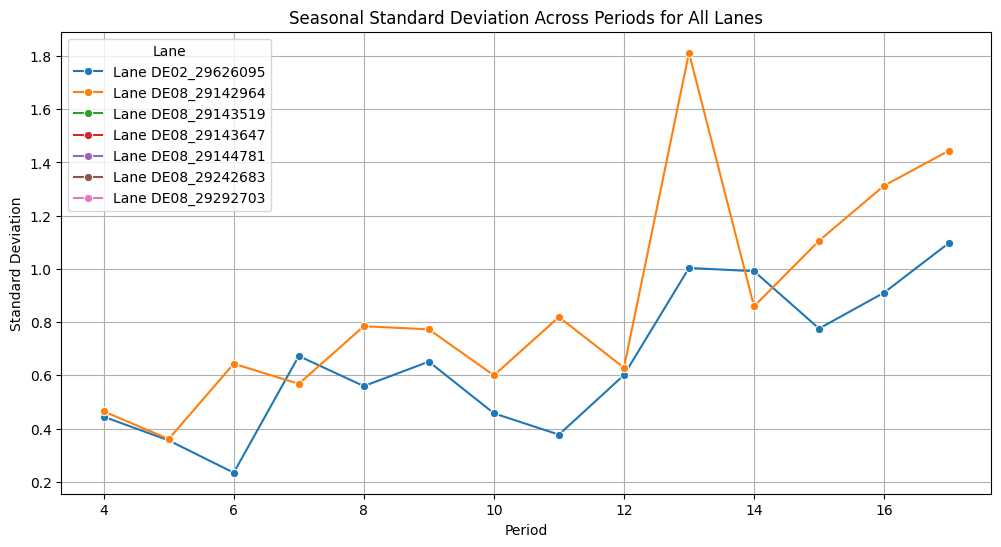

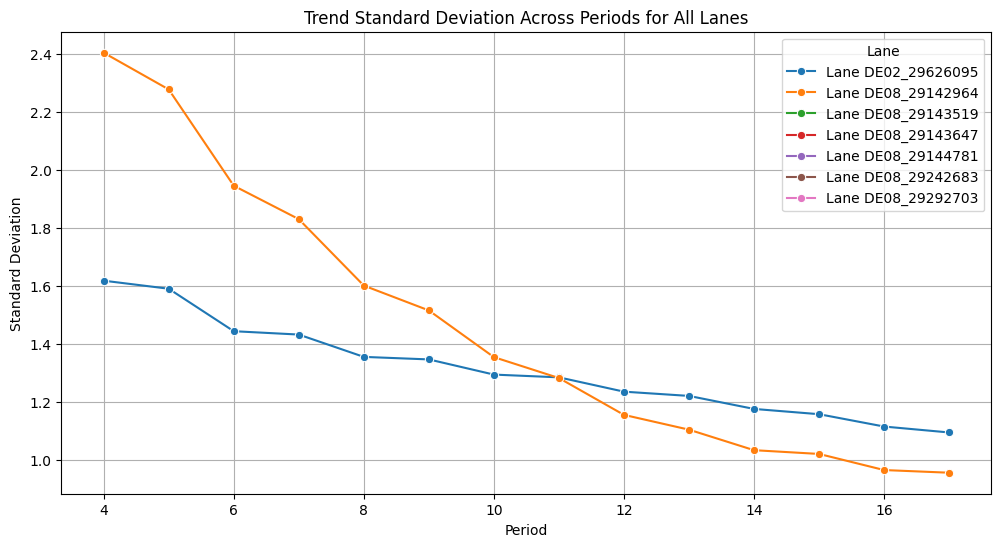

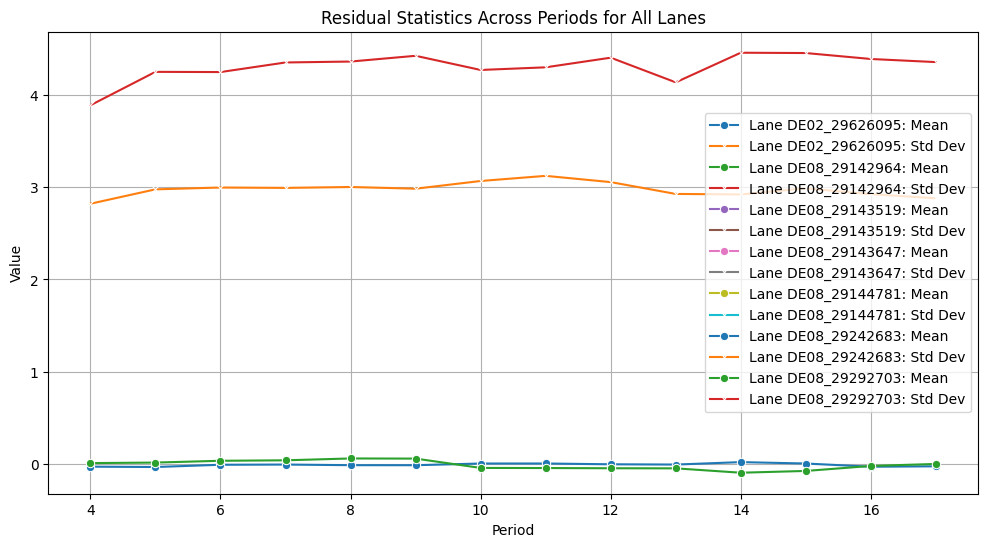

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Initialize empty DataFrames to store data for all components
all_trend_std_dev = pd.DataFrame(columns=['Lane', 'Period', 'Trend_Std_Dev'])
all_seasonal_std_dev = pd.DataFrame(columns=['Lane', 'Period', 'Seasonal_Std_Dev'])
all_residual_stats = pd.DataFrame(columns=['Lane', 'Period', 'Residual_Mean', 'Residual_Std_Dev'])

# Iterate over each lane
for lane in df2['Lane'].unique()[:2]:
    print(f"===========================LANE IS {lane}===========================================")

    # Initialize lists to store results across periods
    trend_std_dev = []
    seasonal_std_dev = []
    residual_mean = []
    residual_std_dev = []

    # Iterate over each period from 4 to 17 (inclusive)
    for period in range(4, 18):
        # Decompose the time series
        data = df2[df2['Lane'] == lane]['shipment']
        result = seasonal_decompose(data, model='additive', period=period)

        # Compute standard deviation of trend
        trend_std_dev.append(np.std(result.trend.dropna()))

        # Compute standard deviation of seasonal component
        seasonal_std_dev.append(np.std(result.seasonal.dropna()))

        # Compute mean and standard deviation of residual component
        residual_mean.append(np.mean(result.resid.dropna()))
        residual_std_dev.append(np.std(result.resid.dropna()))

    # Store trend standard deviation data for the current lane
    lane_trend_std_dev = pd.DataFrame({'Lane': [lane] * len(range(4, 18)),
                                       'Period': list(range(4, 18)),
                                       'Trend_Std_Dev': trend_std_dev})
    all_trend_std_dev = pd.concat([all_trend_std_dev, lane_trend_std_dev])

    # Store seasonal standard deviation data for the current lane
    lane_seasonal_std_dev = pd.DataFrame({'Lane': [lane] * len(range(4, 18)),
                                          'Period': list(range(4, 18)),
                                          'Seasonal_Std_Dev': seasonal_std_dev})
    all_seasonal_std_dev = pd.concat([all_seasonal_std_dev, lane_seasonal_std_dev])

    # Store residual mean and standard deviation data for the current lane
    lane_residual_stats = pd.DataFrame({'Lane': [lane] * len(range(4, 18)),
                                        'Period': list(range(4, 18)),
                                        'Residual_Mean': residual_mean,
                                        'Residual_Std_Dev': residual_std_dev})
    all_residual_stats = pd.concat([all_residual_stats, lane_residual_stats])

# Plot seasonal standard deviation across periods for all lanes
plt.figure(figsize=(12, 6))
for lane in df2['Lane'].unique():
    sns.lineplot(data=all_seasonal_std_dev[all_seasonal_std_dev['Lane'] == lane], x='Period', y='Seasonal_Std_Dev', marker='o', label=f'Lane {lane}')
plt.title('Seasonal Standard Deviation Across Periods for All Lanes')
plt.xlabel('Period')
plt.ylabel('Standard Deviation')
plt.grid(True)
plt.legend(title='Lane')
plt.show()

# Plot trend standard deviation across periods for all lanes
plt.figure(figsize=(12, 6))
for lane in df2['Lane'].unique():
    sns.lineplot(data=all_trend_std_dev[all_trend_std_dev['Lane'] == lane], x='Period', y='Trend_Std_Dev', marker='o', label=f'Lane {lane}')
plt.title('Trend Standard Deviation Across Periods for All Lanes')
plt.xlabel('Period')
plt.ylabel('Standard Deviation')
plt.grid(True)
plt.legend(title='Lane')
plt.show()

# Plot residual mean and standard deviation across periods for all lanes
plt.figure(figsize=(12, 6))
for lane in df2['Lane'].unique():
    sns.lineplot(data=all_residual_stats[all_residual_stats['Lane'] == lane], x='Period', y='Residual_Mean', marker='o', label=f'Lane {lane}: Mean')
    sns.lineplot(data=all_residual_stats[all_residual_stats['Lane'] == lane], x='Period', y='Residual_Std_Dev', marker='x', label=f'Lane {lane}: Std Dev')
plt.title('Residual Statistics Across Periods for All Lanes')
plt.xlabel('Period')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# break the code
# error

In [ ]:
'''# USING 12

# Perform seasonal decomposition with additive model
for lane in df2['Lane'].unique():

  plt.figure(figsize=(8,3))

  data=df2[df2['Lane']==lane][['shipment']]

  result = seasonal_decompose(data['shipment'], model='additive', period=12)

  # Access the decomposed components
  trend = result.trend
  seasonal = result.seasonal
  residual = result.resid


  # Visualization
  plt.figure(figsize=(10, 7))

  plt.subplot(411)
  data['shipment'].plot(kind='line')
  plt.legend()

  plt.subplot(412)
  trend.plot(kind='line')
  plt.legend()

  plt.subplot(413)
  seasonal.plot(kind='line')
  plt.legend()

  plt.subplot(414)
  residual.plot(kind='line')
  plt.legend()

  plt.tight_layout()
  plt.show()

  print(f"MEAN VALUE FOR REIDUAL OF 208 POINTS IS {residual.sum()}")

'''

'# USING 12\n\n# Perform seasonal decomposition with additive model\nfor lane in df2[\'Lane\'].unique():\n\n  plt.figure(figsize=(8,3))\n\n  data=df2[df2[\'Lane\']==lane][[\'shipment\']]\n\n  result = seasonal_decompose(data[\'shipment\'], model=\'additive\', period=12)\n\n  # Access the decomposed components\n  trend = result.trend\n  seasonal = result.seasonal\n  residual = result.resid\n\n\n  # Visualization\n  plt.figure(figsize=(10, 7))\n\n  plt.subplot(411)\n  data[\'shipment\'].plot(kind=\'line\')\n  plt.legend()\n\n  plt.subplot(412)\n  trend.plot(kind=\'line\')\n  plt.legend()\n\n  plt.subplot(413)\n  seasonal.plot(kind=\'line\')\n  plt.legend()\n\n  plt.subplot(414)\n  residual.plot(kind=\'line\')\n  plt.legend()\n\n  plt.tight_layout()\n  plt.show()\n\n  print(f"MEAN VALUE FOR REIDUAL OF 208 POINTS IS {residual.sum()}")\n\n'

In [ ]:
'''##### DECOMPOSITION USING LOESS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

ts=df3['shipment'].copy()

# Perform time series decomposition using LOESS
decomposition = seasonal_decompose(ts, model='additive', period=8)  # Adjust period as needed

# Plot the decomposed components
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()
'''

"##### DECOMPOSITION USING LOESS\nimport numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nfrom statsmodels.tsa.seasonal import seasonal_decompose\n\nts=df3['shipment'].copy()\n\n# Perform time series decomposition using LOESS\ndecomposition = seasonal_decompose(ts, model='additive', period=8)  # Adjust period as needed\n\n# Plot the decomposed components\nplt.figure(figsize=(10, 8))\n\nplt.subplot(411)\nplt.plot(ts, label='Original')\nplt.legend()\n\nplt.subplot(412)\nplt.plot(decomposition.trend, label='Trend')\nplt.legend()\n\nplt.subplot(413)\nplt.plot(decomposition.seasonal, label='Seasonality')\nplt.legend()\n\nplt.subplot(414)\nplt.plot(decomposition.resid, label='Residuals')\nplt.legend()\n\nplt.tight_layout()\nplt.show()\n"

In [ ]:
'''----------> NO trend
----------> YES seasonality
----------> YES random residuals'''

'----------> NO trend\n----------> YES seasonality\n----------> YES random residuals'

In [ ]:
'''STEPS
1.check outliers
2.decompose and fix trends,seasonality etc. # just for obeservability
3.check stationarity (seasonal component can remain because we checked only for weak stationarity)
4. check if seasonal component is there?
4. Find seasonal component (using ACF, pacf, or decomposition)
4.1 either fix it using seasonal decompositoin // or use seasonal ARIMA'''

'STEPS\n1.check outliers\n2.decompose and fix trends,seasonality etc. # just for obeservability\n3.check stationarity (seasonal component can remain because we checked only for weak stationarity)\n4. check if seasonal component is there?\n4. Find seasonal component (using ACF, pacf, or decomposition)\n4.1 either fix it using seasonal decompositoin // or use seasonal ARIMA'

===================Lane is DE02_29626095==========================


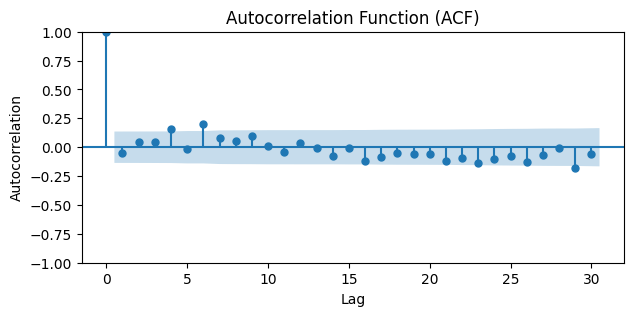

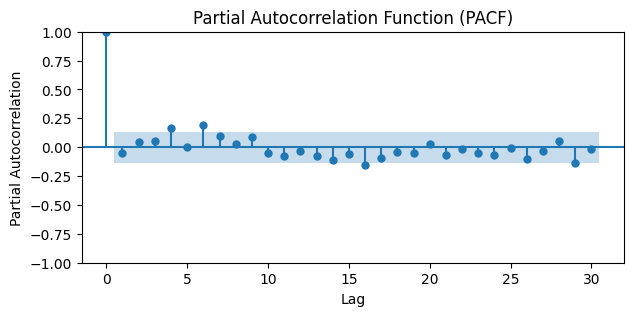

===================Lane is DE08_29142964==========================


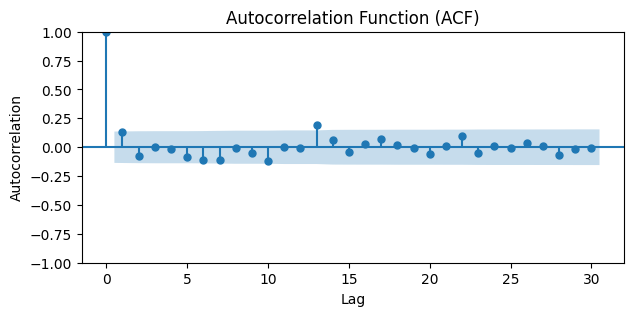

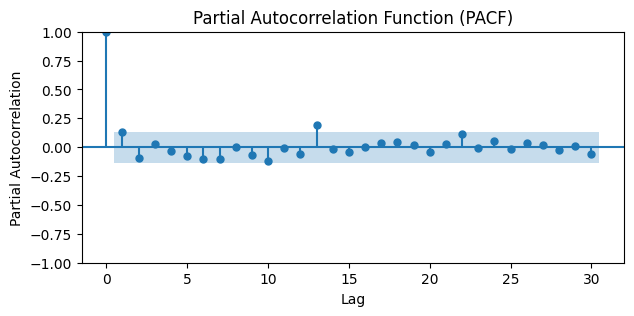

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for lane in df2['Lane'].unique()[:2]:
  print(f"===================Lane is {lane}==========================")
  data = df2[df2['Lane'] == lane][['shipment']]

  '''for period in [12,13]:
    print(f"PERIOD IS {period}")
    result = seasonal_decompose(data, model='additive', period=period)
    residual = result.resid'''


  # Plot ACF
  plt.figure(figsize=(7,3))
  plot_acf(data['shipment'], lags=30, ax=plt.gca())
  plt.title('Autocorrelation Function (ACF)')
  plt.xlabel('Lag')
  plt.ylabel('Autocorrelation')
  plt.show()

  # Plot PACF
  plt.figure(figsize=(7,3))
  plot_pacf(data['shipment'], lags=30, ax=plt.gca())
  plt.title('Partial Autocorrelation Function (PACF)')
  plt.xlabel('Lag')
  plt.ylabel('Partial Autocorrelation')
  plt.show()



In [ ]:
# ACF ------> NO SEASONALITY
# deomposition ------> seasonality

### NO SEASONALITY ;  8 or 12 or 13

### 4 AS IT IS WEEKLY DATA

In [ ]:

## optimised grid search + CROSS VALIDATAOIN
'''
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from itertools import product
from sklearn.metrics import mean_absolute_error

# Define the parameter grid for SARIMAX model
p = [1, 2, 3,4]  # Autoregressive order
d = [1]  # Differencing order
q = [1, 2, 3,4]  # Moving average order
P = [1, 2, 3,4]  # Seasonal autoregressive order
D = [0, 1]  # Seasonal differencing order
Q = [1, 2, 3,4]  # Seasonal moving average order
s = [4]  # Seasonal period (assuming monthly data)

param_grid = product(p, d, q, P, D, Q, s)

tscv = TimeSeriesSplit(n_splits=5)  # Increase number of splits

relevant_data = df2[:140].copy()

train_val_splits = list(tscv.split(relevant_data))

best_score = np.inf
best_params = None

# Perform grid search
for param in param_grid:
    print(f"Testing SARIMAX{param}")
    scores = []
    for train_index, val_index in train_val_splits:
        train_data = relevant_data.iloc[train_index]
        val_data = relevant_data.iloc[val_index]

        # Fit SARIMAX model
        if len(param) == 7:  # Check the length of param
            model = SARIMAX(train_data['shipment'], order=param[:3], seasonal_order=(param[3], param[4], param[5], param[6]))
            try:
                results = model.fit(disp=False)
            except Exception as e:
                print(f"Exception occurred during model fitting: {e}")
                continue

            # Make predictions
            predictions = results.forecast(len(val_data))

            # Evaluate model
            rmse = np.sqrt(mean_squared_error(val_data['shipment'], predictions))
            scores.append(rmse)

    # Average RMSE across all splits
    if scores:
        avg_score = np.mean(scores)

        # Update best parameters if the current model has lower RMSE
        if avg_score < best_score:
            best_score = avg_score
            best_params = param

print(f"Best parameters: SARIMAX{best_params}, error of --> RMSE: {best_score}")'''


'\nimport numpy as np\nfrom statsmodels.tsa.statespace.sarimax import SARIMAX\nfrom sklearn.model_selection import TimeSeriesSplit\nfrom sklearn.metrics import mean_squared_error\nfrom itertools import product\nfrom sklearn.metrics import mean_absolute_error\n\n# Define the parameter grid for SARIMAX model\np = [1, 2, 3,4]  # Autoregressive order\nd = [1]  # Differencing order\nq = [1, 2, 3,4]  # Moving average order\nP = [1, 2, 3,4]  # Seasonal autoregressive order\nD = [0, 1]  # Seasonal differencing order\nQ = [1, 2, 3,4]  # Seasonal moving average order\ns = [4]  # Seasonal period (assuming monthly data)\n\nparam_grid = product(p, d, q, P, D, Q, s)\n\ntscv = TimeSeriesSplit(n_splits=5)  # Increase number of splits\n\nrelevant_data = df2[:140].copy()\n\ntrain_val_splits = list(tscv.split(relevant_data))\n\nbest_score = np.inf\nbest_params = None\n\n# Perform grid search\nfor param in param_grid:\n    print(f"Testing SARIMAX{param}")\n    scores = []\n    for train_index, val_index i

In [ ]:
###########################################################################################
################################################################## CASE in focus #####
###########################################################################################

In [ ]:
import time


LANE IS DE08_29144781
Testing SARIMAX --(0, 0, 0, 0, 0, 0, 52)--
208 is data length
forecast steps are 48
model fitting----------
forecasting
forecast done
Weighted MAPE: 100.0% ++++++++++++++++++
RMSE: 7.980444849756184++++++++++++++++++
RMSE Error lowered for given lane = DE08_29144781, from (inf, inf) --> rmse,mape : (7.980444849756184, 100.0)%
Decrease happened 0-th time


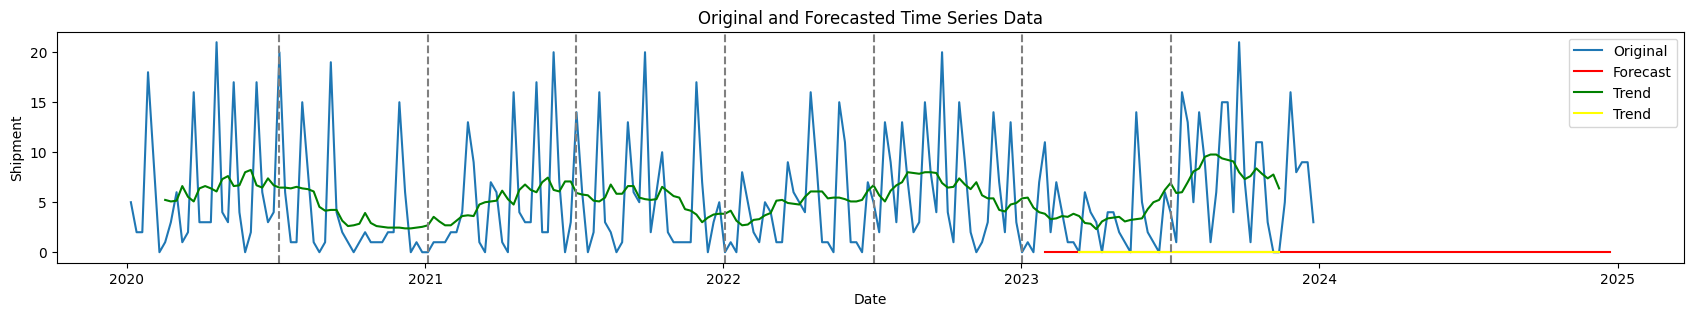

Time elapsed is  0.52577805519104
Testing SARIMAX --(0, 0, 0, 0, 0, 0, 13)--
208 is data length
forecast steps are 48
model fitting----------
forecasting
forecast done
Weighted MAPE: 100.0% ++++++++++++++++++
RMSE: 7.980444849756184++++++++++++++++++
Testing SARIMAX --(0, 0, 0, 0, 0, 1, 52)--
208 is data length
forecast steps are 48
model fitting----------
forecasting
forecast done
Weighted MAPE: 61.52% ++++++++++++++++++
RMSE: 5.043867294734112++++++++++++++++++
RMSE Error lowered for given lane = DE08_29144781, from (7.980444849756184, 100.0) --> rmse,mape : (5.043867294734112, 61.52)%
Decrease happened 1-th time


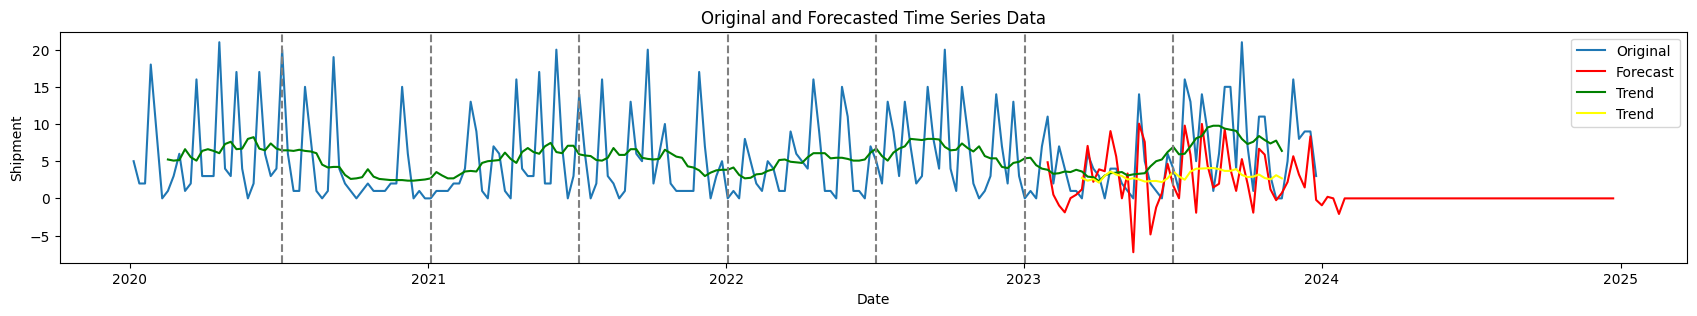

Time elapsed is  3.6713287830352783
Testing SARIMAX --(0, 0, 0, 0, 0, 1, 13)--
208 is data length
forecast steps are 48
model fitting----------
forecasting
forecast done
Weighted MAPE: 99.51% ++++++++++++++++++
RMSE: 7.958028529784743++++++++++++++++++
Testing SARIMAX --(0, 0, 0, 0, 0, 2, 52)--
208 is data length
forecast steps are 48
model fitting----------
forecasting
forecast done
Weighted MAPE: 54.35% ++++++++++++++++++
RMSE: 4.522690750720133++++++++++++++++++
RMSE Error lowered for given lane = DE08_29144781, from (5.043867294734112, 61.52) --> rmse,mape : (4.522690750720133, 54.35)%
Decrease happened 2-th time


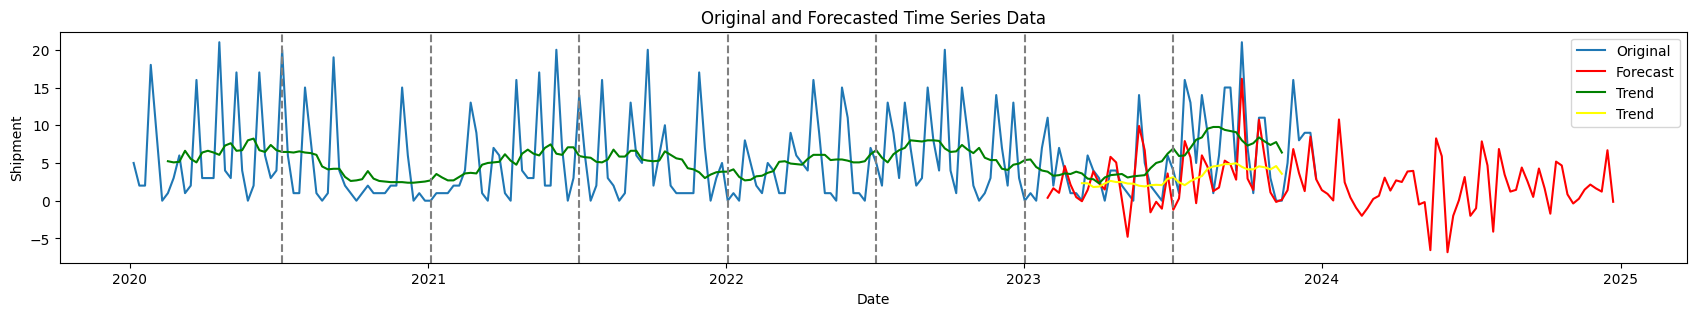

Time elapsed is  15.520779609680176
Testing SARIMAX --(0, 0, 0, 0, 0, 2, 13)--
208 is data length
forecast steps are 48
model fitting----------
forecasting
forecast done
Weighted MAPE: 97.21% ++++++++++++++++++
RMSE: 7.937583731135192++++++++++++++++++
Testing SARIMAX --(0, 0, 0, 0, 1, 0, 52)--
208 is data length
forecast steps are 48
model fitting----------
forecasting
forecast done
Weighted MAPE: 35.79% ++++++++++++++++++
RMSE: 3.310337344340201++++++++++++++++++
RMSE Error lowered for given lane = DE08_29144781, from (4.522690750720133, 54.35) --> rmse,mape : (3.310337344340201, 35.79)%
Decrease happened 3-th time


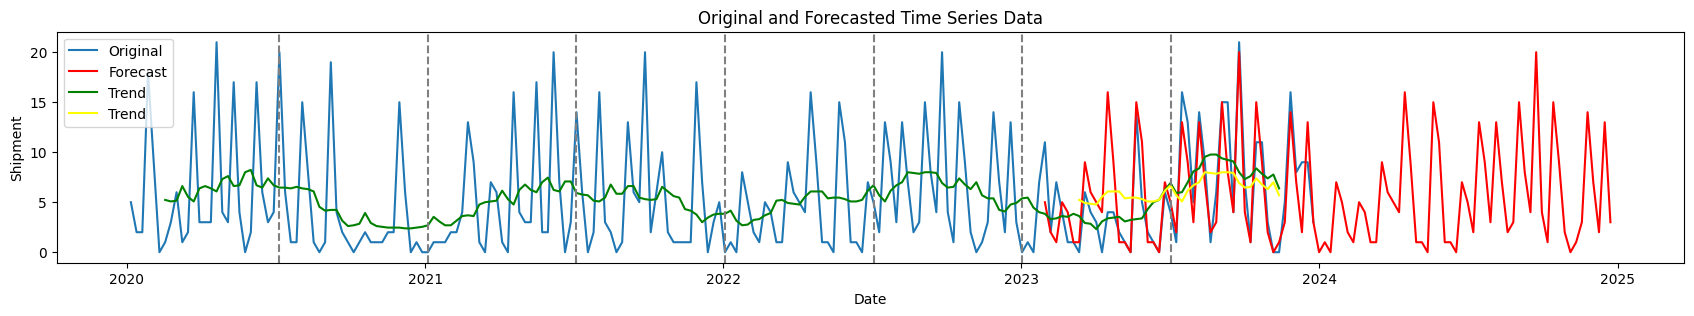

Streaming output truncated to the last 5000 lines.
Weighted MAPE: 44.58% ++++++++++++++++++
RMSE: 3.8273023645230633++++++++++++++++++
Testing SARIMAX --(0, 0, 0, 1, 1, 2, 13)--
208 is data length
forecast steps are 48
model fitting----------
forecasting
forecast done
Weighted MAPE: 59.98% ++++++++++++++++++
RMSE: 5.092269386182253++++++++++++++++++
Testing SARIMAX --(0, 0, 0, 2, 0, 0, 52)--
208 is data length
forecast steps are 48
model fitting----------
forecasting
forecast done
Weighted MAPE: 44.11% ++++++++++++++++++
RMSE: 3.8211000061082476++++++++++++++++++
Testing SARIMAX --(0, 0, 0, 2, 0, 0, 13)--
208 is data length
forecast steps are 48
model fitting----------
forecasting
forecast done
Weighted MAPE: 78.03% ++++++++++++++++++
RMSE: 6.727959515564115++++++++++++++++++
Testing SARIMAX --(0, 0, 0, 2, 0, 1, 52)--
208 is data length
forecast steps are 48
model fitting----------
forecasting
forecast done
Weighted MAPE: 47.66% ++++++++++++++++++
RMSE: 4.013370513447698+++++++++++++++

In [ ]:
'''#### GRID SEARCH FOR 4,5,6,7 LANE''' # and other 3 also will run in future

import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from itertools import product
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


####################################################################

# PARAMETERS
p = [0,1,2]  # Autoregressive order
d = [0,1]  # Differencing order
q = [0,1,2]  # Moving average order
P = [0,1,2]  # Seasonal autoregressive order
D = [0,1]  # Seasonal differencing order
Q = [0,1,2]  # Seasonal moving average order
s = [52,13]  # Seasonal period (assuming monthly data)


param_grid = product(p, d, q, P, D, Q, s)

'''(208) data points'''

time_s = time.time()

# Perform grid search
for lane in ['DE08_29144781']:
    print(f"LANE IS {lane}")

    best_rmse = np.inf
    best_mape = np.inf
    best_params = None
    errors=[]

    ################################## predictions for another year
    k=52
    ################################## TRAIN SIZE =160
    train_size= 160 #(df2.Lane.value_counts()[0])*(160/208)

    i=0 # used for tracking the TIMES that the error decreases

    for param in param_grid:

        ##################### limiting the increments and error threshold #########################
        if best_mape< 35 or best_rmse<3: # or i==10
            break

        print(f"Testing SARIMAX --{param}--")

        data=df2[df2['Lane']==lane][['shipment']]
        print(len(data) , 'is data length')

        #train_size = 150  # Adjust as needed
        forecast_steps = len(data)-train_size  # Adjust as needed
        print(f"forecast steps are {forecast_steps}")

        # Split the data into train and test sets
        train_data = data.iloc[:train_size]
        val_data=data.iloc[train_size:]


        # Fit SARIMAX model with the best parameters
        model = SARIMAX(train_data['shipment'], order=param[:3], seasonal_order=(param[3], param[4], param[5], param[6]))
        try:
            print("model fitting----------")
            results = model.fit()
        except:
            print(f"Error occurred for parameters: SARIMAX{param}")
            continue

        # Make predictions for the future
        print("forecasting")
        forecast = results.forecast(steps=forecast_steps + k)
        print('forecast done')

        ### ERROR CALCULATION #################################################################

        val_data['pred_shipment']=pd.DataFrame(forecast)[:-k]['predicted_mean'].tolist()


        ########## mape error calculation ###############################################
        epsilon = 1e-8

        val_data['abs_error'] = np.abs(val_data['shipment'] - val_data['pred_shipment'])
        val_data['abs_error_rounded'] = round(val_data['abs_error'], 2)
        # Calculate percentage error, handling division by zero
        val_data['percent_error'] = (val_data['abs_error_rounded'] / (val_data['shipment'] + epsilon)) * 100

        # Calculate weighted MAPE
        weighted_errors = val_data['percent_error'] * val_data['shipment']
        weighted_mape = round(np.sum(weighted_errors) / np.sum(val_data['shipment']), 2)

        # Calculate RMSE #################################################################
        rmse = np.sqrt(np.mean((val_data['abs_error'])**2))

        # Print weighted MAPE and RMSE
        print(f"Weighted MAPE: {weighted_mape}% ++++++++++++++++++")
        print(f"RMSE: {rmse}++++++++++++++++++")

        #### PARAM LOGGING ######################################################################
        errors.append((weighted_mape,rmse))

        # Update best parameters if the current model has lower RMSE
        if rmse < best_rmse*1.1:


            if (rmse < best_rmse )and (weighted_mape< best_mape):
                print(f"RMSE Error lowered for given lane = {lane}, from {best_rmse, best_mape} --> rmse,mape : {rmse , weighted_mape}%")
                print(f"Decrease happened {i}-th time")

                i=i+1
                best_rmse = rmse
                best_mape= weighted_mape
                best_params = param


                ################ PLOT IF ERROR IS LESS ################################################
                # Plot the original time series data and the forecasted values


                plt.figure(figsize=(21,3))
                plt.plot(data.index, data['shipment'], label='Original')
                plt.plot(forecast.index , forecast, color='red', label='Forecast')

                ###### using 52 for trend decomposition
                decompose =seasonal_decompose(data['shipment'], model='additive', period=13)
                trend=decompose.trend
                plt.plot(trend.index , trend,color='green' ,label = 'Trend')

                ###### using 52 for trend decomposition
                decompose2 =seasonal_decompose(val_data['pred_shipment'], model='additive', period=13)
                trend2=decompose2.trend
                plt.plot(trend2.index , trend2,color='yellow' ,label = 'Trend')


                for pp in range(26, len(data), 26):
                    plt.axvline(data.index[pp], color='gray', linestyle='--')


                plt.xlabel('Date')
                plt.ylabel('Shipment')
                plt.title('Original and Forecasted Time Series Data')
                plt.legend()
                plt.show()
                print("Time elapsed is ",time.time()-time_s)

    print(f"THE BEST FIT MODEL for lane {lane} WITH LOWEST ERROR {best_rmse, best_mape} IS PLOTTED ABOVE")



In [ ]:
################### MAKING AN LSTM model ##########################
###################################################################
###################################################################